In [15]:
import re
import os
import matplotlib.pyplot as plt

In [16]:
FILE_TO_USE = './RI-tknz-data/extensiondigital.fpsico.unr.edu.ar.txt'
FILE_OUTPUT = './output.txt'
MAX_LONG = 20
MIN_LONG = 3

In [17]:
def removeStopWords(words_list, stop_words_list):
    cleaned_text = [word for word in words_list if word not in stop_words_list]
    return cleaned_text

In [18]:
def findAbbreviations(content):
    REGEX_ABBREVIATIONS = r'\b[a-zA-Z][bcdfgh-np-tvxz]+(?![A-Z])\.'
    return re.findall(REGEX_ABBREVIATIONS, content)

In [19]:
def findEmailsAndUrls(content):
    REGEX_EMAILS = r'\b[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'
    REGEX_URLS = r'(https?://)?(www\.[a-z0-9]+(?:\.[a-z0-9]+)+)'
    list_emails = re.findall(REGEX_EMAILS, content)
    list_urls = [''.join(url_tuple) for url_tuple in re.findall(REGEX_URLS, content)]
    return list_emails + list_urls

In [20]:
def findNumbersAndPhones(content):
    REGEX_NUMBERS = r' (\d+)'
    REGEX_PHONES = r'\+?\d{6,}|\+?\d{8,}|\d{2,}-\d{5,}|\+?\d+-\d{2,}-\d{5,}'
    list_numbers = re.findall(REGEX_NUMBERS, content)
    list_phones = re.findall(REGEX_PHONES, content)
    return list_phones + list_numbers

In [21]:
def findWords(content):
    REGEX_WORDS = f'[A-zÀ-ú]{{{MIN_LONG},{MAX_LONG}}}'
    return re.findall(REGEX_WORDS, content)

In [22]:
def tokenizer(content, stop_words_list = None):
    abbreviations_list = findAbbreviations(content)
    emailsAndUrls_list = findEmailsAndUrls(content)
    numbersAndPhones_list = findNumbersAndPhones(content)
    words_list = findWords(content)
    content = abbreviations_list + emailsAndUrls_list + numbersAndPhones_list + words_list
    if stop_words_list != None:
        content = removeStopWords(content, stop_words_list)
    return content

In [23]:
def calc_heaps_law(tokens, file_output):
    # Creamos un diccionario para contar la frecuencia de cada término
    frecuencia = {}
    frecuencias = []
    with open(file_output, 'w', encoding='utf8') as f:
        for token in tokens:
            frecuencia[token] = frecuencia.get(token, 0) + 1
            # Calculamos el número de términos procesados y términos únicos después de procesar cada término
            total_terminos = sum(frecuencia.values())
            terminos_unicos = len(frecuencia)
            frecuencias.append((total_terminos, terminos_unicos))
            f.write(f"{total_terminos},{terminos_unicos}\n")
    return frecuencias

In [24]:
def process_file(file, output):
    with open(os.path.abspath(file), 'r', encoding='utf8') as f:
        content = f.read()
        tokens = tokenizer(content)
        return calc_heaps_law(tokens, output)

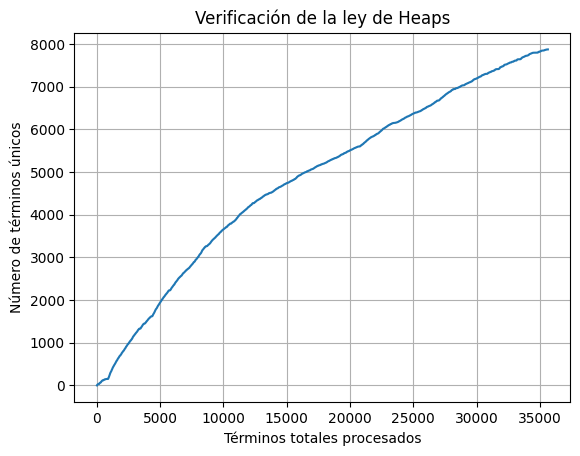

In [25]:
pairs = process_file(FILE_TO_USE, FILE_OUTPUT)
x = [pair[0] for pair in pairs]
y = [pair[1] for pair in pairs]
plt.plot(x, y)
plt.title('Verificación de la ley de Heaps')
plt.xlabel('Términos totales procesados')
plt.ylabel('Número de términos únicos')
plt.grid(True)
plt.show()
